# Webscraping | Day04 | Clusters


In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 

## Import and explore the data - EDA 

In [63]:
#fetch data 
features=pd.read_csv('/Users/AFROARC/Documents/GitHub/nomaditect_portfolio/highlighted_projects/song_recomender/python_code/audio_features.csv')

In [64]:
#preview 
features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.933,0.528,5,-6.472,0,0.1620,0.1120,0.329000,0.163,0.756,109.975,audio_features,57JVGBtBLCfHw2muk5416J,spotify:track:57JVGBtBLCfHw2muk5416J,https://api.spotify.com/v1/tracks/57JVGBtBLCfH...,https://api.spotify.com/v1/audio-analysis/57JV...,214653,4
1,1,0.547,0.820,8,-6.728,1,0.0805,0.2610,0.000000,0.300,0.933,118.208,audio_features,2Nz6aF1umHh5Et6I5H581L,spotify:track:2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/tracks/2Nz6aF1umHh5...,https://api.spotify.com/v1/audio-analysis/2Nz6...,172867,4
2,2,0.274,0.949,11,-8.642,1,0.0896,0.0214,0.007780,0.218,0.497,100.346,audio_features,5Q41NLTmGbVPozwHKK7bk2,spotify:track:5Q41NLTmGbVPozwHKK7bk2,https://api.spotify.com/v1/tracks/5Q41NLTmGbVP...,https://api.spotify.com/v1/audio-analysis/5Q41...,406307,4
3,3,0.500,0.748,4,-9.072,1,0.0363,0.1270,0.000000,0.447,0.514,118.852,audio_features,4bHsxqR3GMrXTxEPLuK5ue,spotify:track:4bHsxqR3GMrXTxEPLuK5ue,https://api.spotify.com/v1/tracks/4bHsxqR3GMrX...,https://api.spotify.com/v1/audio-analysis/4bHs...,250987,4
4,4,0.451,0.962,0,-3.947,1,0.0734,0.0188,0.000003,0.277,0.377,131.435,audio_features,4ECNtOnqzxutZkXP4TE3n3,spotify:track:4ECNtOnqzxutZkXP4TE3n3,https://api.spotify.com/v1/tracks/4ECNtOnqzxut...,https://api.spotify.com/v1/audio-analysis/4ECN...,323707,4


In [65]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        784 non-null    int64  
 1   danceability      784 non-null    float64
 2   energy            784 non-null    float64
 3   key               784 non-null    int64  
 4   loudness          784 non-null    float64
 5   mode              784 non-null    int64  
 6   speechiness       784 non-null    float64
 7   acousticness      784 non-null    float64
 8   instrumentalness  784 non-null    float64
 9   liveness          784 non-null    float64
 10  valence           784 non-null    float64
 11  tempo             784 non-null    float64
 12  type              784 non-null    object 
 13  id                784 non-null    object 
 14  uri               784 non-null    object 
 15  track_href        784 non-null    object 
 16  analysis_url      784 non-null    object 
 1

In [66]:
features.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,391.500000,0.567277,0.643132,5.006378,-9.439242,0.741071,0.054457,0.260331,0.056431,0.182935,0.634696,122.556790,245585.576531,3.964286
std,226.465597,0.141117,0.207345,3.524946,3.601253,0.438326,0.043556,0.264862,0.170828,0.151283,0.232926,26.079867,84123.731312,0.250160
min,0.000000,0.193000,0.019500,0.000000,-33.350000,0.000000,0.022500,0.000007,0.000000,0.029300,0.031300,61.084000,60672.000000,1.000000
25%,195.750000,0.472750,0.490750,2.000000,-11.798000,0.000000,0.032675,0.043375,0.000003,0.083900,0.471000,105.701750,190856.500000,4.000000
50%,391.500000,0.567000,0.661000,5.000000,-9.154000,1.000000,0.039600,0.159500,0.000157,0.123500,0.662500,121.579500,232040.000000,4.000000
75%,587.250000,0.667000,0.806750,9.000000,-6.699000,1.000000,0.058000,0.422750,0.007705,0.243250,0.831000,136.574000,282663.000000,4.000000
max,783.000000,0.980000,0.987000,11.000000,-1.574000,1.000000,0.410000,0.989000,0.959000,0.977000,0.985000,208.282000,811077.000000,5.000000


# drop non numerical

In [67]:
numerical_df = features.drop(['Unnamed: 0','type','id','uri','track_href','analysis_url'],axis=1) 

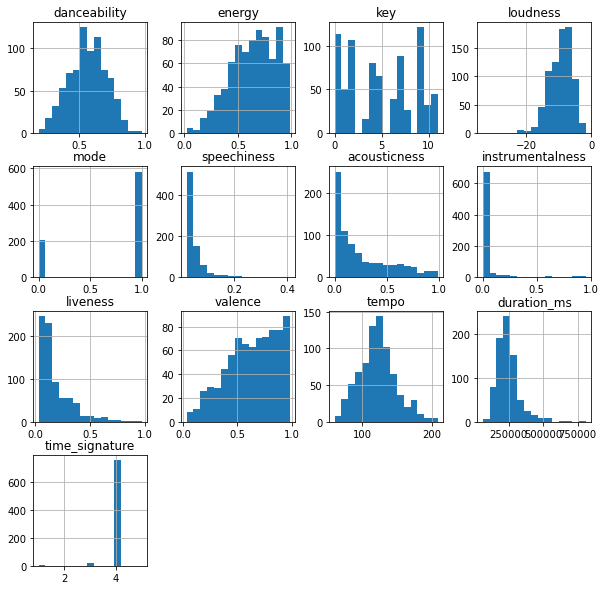

In [68]:
#look at the distribution 
numerical_df.hist(bins=15, figsize=(10,10));

#### awareness of KMEANS restrictions 
- everything must be numerical 
- ideally similar scales for all data points 

## Visualise to look for patterns

+ how to show 4 numerical fields in one 2d visual ? 
+ use colour and size plus two axis 

In [111]:
dflist = numerical_df.columns.to_list()
dflist

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'cluster']

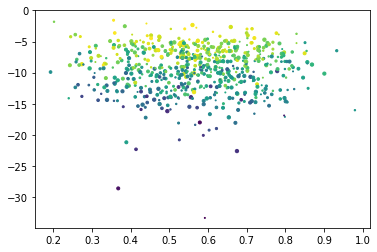

In [69]:
plt.scatter(numerical_df.iloc[:,0],numerical_df.iloc[:,3],numerical_df.iloc[:,2],numerical_df.iloc[:,1]);
#x=danceability, y= loudness, size= key, colour=energy

+ also examined the data in tableau 
+ looked for geographical patterns - definitely visible in urban popln
+ can see some clusters potentially in the other variables 
+ we only have 50 states, so lets try clustering into 5 groups 

## Apply Clustering 

In [70]:
kmeans=KMeans(n_clusters=15)
#have to set a starting cluster number 

In [71]:
cluster=kmeans.fit(numerical_df)

## Explore clusters 

In [72]:
cluster.cluster_centers_

array([[ 5.79010204e-01,  6.65438776e-01,  4.39795918e+00,
        -8.91905102e+00,  7.65306122e-01,  5.45418367e-02,
         2.63805408e-01,  2.46252152e-02,  1.85139796e-01,
         6.74459184e-01,  1.23400418e+02,  2.07117724e+05,
         3.97959184e+00],
       [ 5.30763158e-01,  6.43421053e-01,  4.39473684e+00,
        -9.62052632e+00,  7.10526316e-01,  5.98789474e-02,
         2.01507289e-01,  7.87872463e-02,  2.47992105e-01,
         5.40936842e-01,  1.22465947e+02,  3.26542368e+05,
         3.97368421e+00],
       [ 4.85388889e-01,  6.29333333e-01,  5.05555556e+00,
        -1.02335556e+01,  6.11111111e-01,  4.85500000e-02,
         2.44122222e-01,  8.24963278e-02,  1.65894444e-01,
         4.71500000e-01,  1.19572278e+02,  5.05614167e+05,
         3.94444444e+00],
       [ 6.01464646e-01,  6.61383838e-01,  5.14141414e+00,
        -9.69217172e+00,  7.07070707e-01,  4.47010101e-02,
         1.90366040e-01,  2.28015749e-02,  1.67152525e-01,
         6.58638384e-01,  1.19759374e

In [73]:
cluster.labels_

array([ 0, 14,  8,  3,  1,  3,  9,  3,  3,  3,  6,  5,  3, 13,  0,  3, 13,
       14,  1,  0,  6,  1,  6,  0,  0,  6, 13,  0, 11, 13, 11,  3,  9,  2,
       13,  6, 11,  6,  0,  4, 13,  6, 11,  4,  1,  6, 11, 13, 11,  5,  3,
        6, 13, 13,  3,  1,  6,  3,  0,  3,  6, 13,  4,  4,  0,  5,  0,  6,
        6, 11, 13,  3, 13,  5,  0,  3,  3,  4,  2, 13,  0, 11,  5, 11,  3,
       11,  6, 11,  0, 11,  4,  5, 13, 11,  5,  4, 13,  0,  6, 14, 11,  5,
        0,  6,  4,  5,  3, 11, 14,  3,  0, 14,  9,  9, 14,  0,  1,  6,  4,
        3,  0,  3,  9,  1,  8,  6,  4,  0,  4,  1,  2,  9,  6, 13, 13,  6,
       13,  0,  4,  4,  4,  9,  4,  0, 11,  0,  9,  4,  4,  0,  9,  4,  3,
        6,  0,  0,  3,  1,  3,  0,  1, 14,  9, 13,  0,  3,  4,  0,  8,  0,
       13,  3, 13,  6, 13,  4,  3,  3, 11, 11, 13,  4,  3,  6,  6,  3,  6,
        4,  6, 13, 14, 11,  0,  4,  6, 11, 13, 13, 11,  3,  6, 11, 13,  0,
        0,  6, 11,  0,  1,  4, 14,  6,  5, 13,  0, 13,  4,  0,  3,  4,  3,
        0,  6,  0,  2,  0

In [74]:
#bring cluster into data frame
numerical_df=numerical_df.copy()
numerical_df['cluster']=cluster.labels_

In [75]:
numerical_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.933,0.528,5,-6.472,0,0.1620,0.1120,0.329000,0.163,0.756,109.975,214653,4,0
1,0.547,0.820,8,-6.728,1,0.0805,0.2610,0.000000,0.300,0.933,118.208,172867,4,14
2,0.274,0.949,11,-8.642,1,0.0896,0.0214,0.007780,0.218,0.497,100.346,406307,4,8
3,0.500,0.748,4,-9.072,1,0.0363,0.1270,0.000000,0.447,0.514,118.852,250987,4,3
4,0.451,0.962,0,-3.947,1,0.0734,0.0188,0.000003,0.277,0.377,131.435,323707,4,1


## Visually explore clusters 

### 2 fields at a time with cluster on colour 

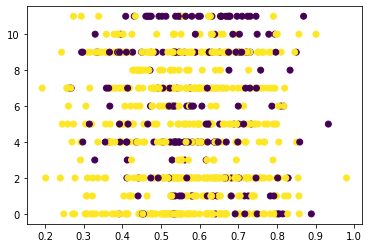

In [76]:
plt.scatter(numerical_df.iloc[:,0],numerical_df.iloc[:,2],c=numerical_df.iloc[:,4]);
# plot 2 numeric values with the cluster to examine it 

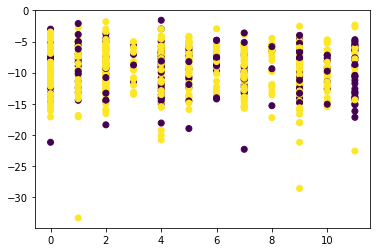

In [77]:
plt.scatter(numerical_df.iloc[:,2],numerical_df.iloc[:,3],c=numerical_df.iloc[:,4]);

### 3 d plotting with plotly 

In [78]:
numerical_df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.933,0.528,5,-6.472,0,0.162,0.112,0.329,0.163,0.756,109.975,214653,4,0


In [121]:
#x=danceability, y= loudness, size= key, colour=energy

markersize= numerical_df['key']
markercolour= numerical_df['energy']

fig1=go.Scatter3d(x=numerical_df['danceability'],
                  y=numerical_df['loudness'],
                  z=numerical_df['acousticness'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Viridis'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='loudness'),
                              zaxis=dict(title='acousticness')))

In [122]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

In [81]:
numerical_df.to_csv('numerical_df.csv')

## Scaling the data - before clustering 
+ will it make a difference 
+ we know clustering algorithms 

In [82]:
numerical_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.933,0.528,5,-6.472,0,0.1620,0.1120,0.329000,0.163,0.756,109.975,214653,4,0
1,0.547,0.820,8,-6.728,1,0.0805,0.2610,0.000000,0.300,0.933,118.208,172867,4,14
2,0.274,0.949,11,-8.642,1,0.0896,0.0214,0.007780,0.218,0.497,100.346,406307,4,8
3,0.500,0.748,4,-9.072,1,0.0363,0.1270,0.000000,0.447,0.514,118.852,250987,4,3
4,0.451,0.962,0,-3.947,1,0.0734,0.0188,0.000003,0.277,0.377,131.435,323707,4,1


In [83]:
from sklearn.preprocessing import StandardScaler 

In [84]:
features_scaled=StandardScaler().fit_transform(numerical_df)

In [88]:
features_scaled.shape

(784, 14)

In [90]:
features_scaled_df=pd.DataFrame(features_scaled,columns=['danceability','energy', 'key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'cluster'])

In [91]:
features_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,2.593289,-0.555622,-0.001810,0.824473,-1.691765,2.470659,-0.560389,1.596591,-0.131854,0.521115,-0.482741,-0.367938,0.142857,-1.413791
1,-0.143780,0.853556,0.849810,0.753341,0.591099,0.598310,0.002528,-0.330551,0.774313,1.281497,-0.166855,-0.864976,0.142857,1.593528
2,-2.079582,1.476104,1.701430,0.221520,0.591099,0.807370,-0.902673,-0.284979,0.231935,-0.591535,-0.852189,1.911756,0.142857,0.304677
3,-0.477050,0.506087,-0.285684,0.102041,0.591099,-0.417123,-0.503719,-0.330551,1.746624,-0.518504,-0.142146,0.064249,0.142857,-0.769365
4,-0.824501,1.538841,-1.421177,1.526066,0.591099,0.435197,-0.912495,-0.330533,0.622183,-1.107048,0.340641,0.929242,0.142857,-1.198982


In [92]:
features_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
count,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02
mean,-2.257265e-16,1.026673e-16,-5.650242e-17,-2.390378e-16,5.689893e-16,-6.875169e-17,-7.930164e-17,-5.317458e-17,7.094665e-17,-7.731910e-17,5.777691e-17,-1.699321e-18,-5.075305e-16,1.818273e-16
std,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00
min,-2.653941e+00,-3.009619e+00,-1.421177e+00,-6.643805e+00,-1.691765e+00,-7.341590e-01,-9.834949e-01,-3.305511e-01,-1.016195e+00,-2.592156e+00,-2.358602e+00,-2.199517e+00,-1.185714e+01,-1.413791e+00
25%,-6.702753e-01,-7.353891e-01,-8.534305e-01,-6.554006e-01,-1.691765e+00,-5.004026e-01,-8.196518e-01,-3.305351e-01,-6.550504e-01,-7.032291e-01,-6.466981e-01,-6.509936e-01,1.428571e-01,-7.693651e-01
50%,-1.962646e-03,8.622944e-02,-1.810417e-03,7.925698e-02,5.910986e-01,-3.413104e-01,-3.809353e-01,-3.296344e-01,-3.931217e-01,1.194442e-01,-3.749687e-02,-1.611225e-01,1.428571e-01,-1.249396e-01
75%,7.071224e-01,7.896121e-01,1.133683e+00,7.613994e-01,5.910986e-01,8.140391e-02,6.136147e-01,-2.854185e-01,3.989481e-01,8.433109e-01,5.378156e-01,4.410300e-01,1.428571e-01,9.491028e-01
max,2.926559e+00,1.659490e+00,1.701430e+00,2.185424e+00,5.910986e-01,8.168112e+00,2.752889e+00,5.286862e+00,5.252236e+00,1.504886e+00,3.289125e+00,6.726430e+00,4.142857e+00,1.593528e+00


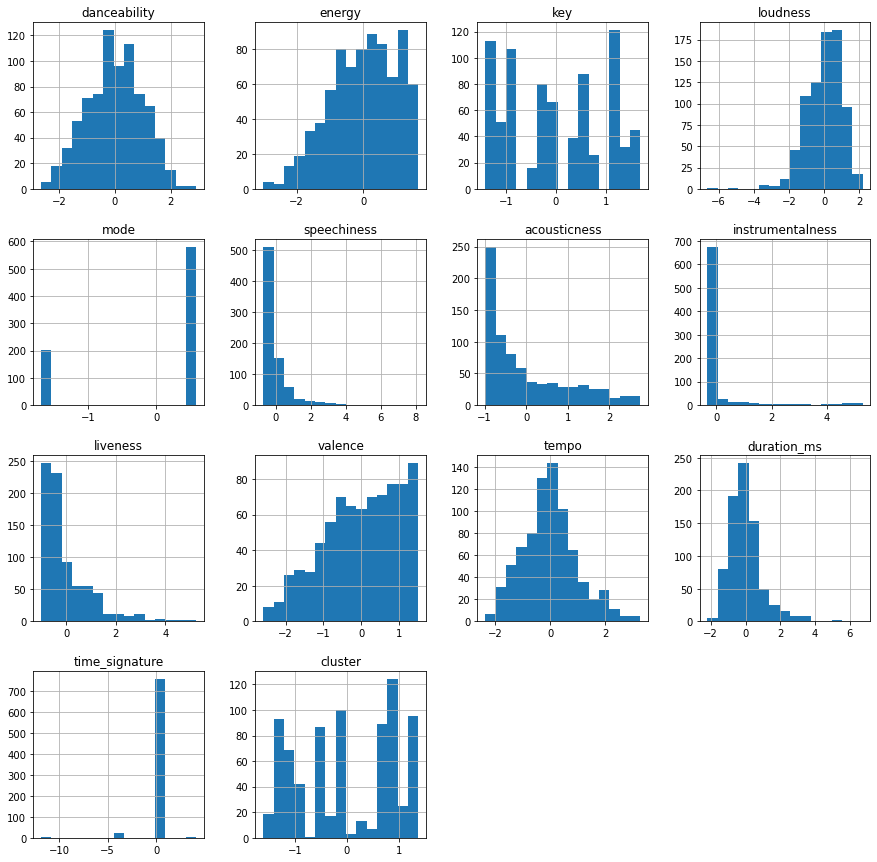

In [ ]:
features_scaled_df.hist(bins=15, figsize=(15,15));

# scaled 3d plot

In [94]:
#markersize= features_scaled_df['key']
#x=danceability, y= loudness, size= key, colour=energy

markercolour= features_scaled_df['cluster']

fig2=go.Scatter3d(x=features_scaled_df['danceability'],
                  y=features_scaled_df['loudness'],
                  z=features_scaled_df['tempo'],
                 marker=dict (#size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Viridis'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='loudness'),
                              zaxis=dict(title='tempo')))

In [95]:
plotly.offline.plot({"data":[fig2],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# finding optimal K

In [96]:
kmeans.inertia_

55558213643.3989

In [98]:
kmeans=KMeans(n_clusters=9)
kmeans.fit(features_scaled_df)

KMeans(n_clusters=9)

In [99]:
K= range(2,30)

In [101]:
#gathering the k inertia values 
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

print(inertia) 

[9733.075125644697, 9133.523558790619, 8631.11361352064, 8159.143745387636, 7748.120269822459, 7393.902651958677, 6867.540717899555, 6639.806498847617, 6432.023872556549, 6251.321150433081, 6107.967620026257, 5908.985334562058, 5793.017252571369, 5669.4355712051, 5524.0645970584455, 5443.824745991174, 5344.572846387381, 5243.783696504483, 5154.62344886658, 5054.444415832179, 5021.1291617108445, 4949.939223874253, 4881.480016861221, 4836.858420924308, 4750.521913209656, 4692.562429074377, 4671.276058369557, 4617.0349600258305]


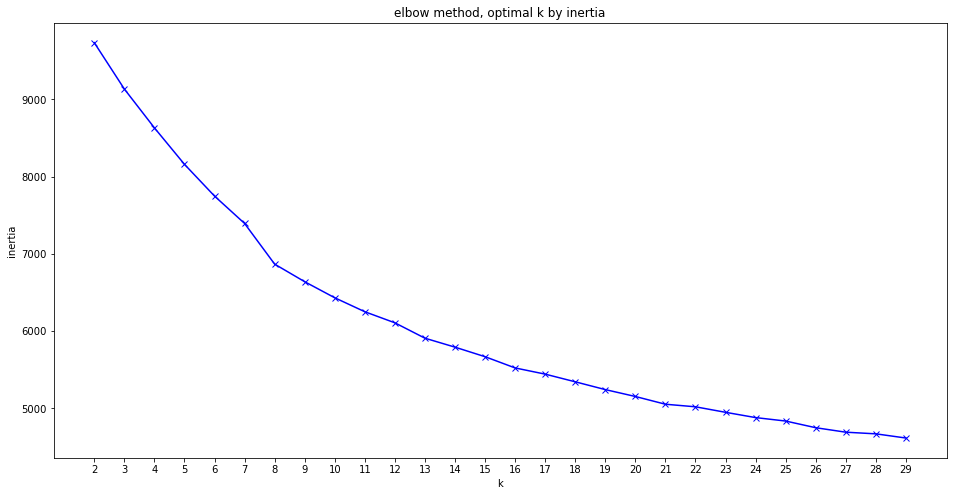

In [102]:
# plot the results 
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

In [103]:
from sklearn.metrics import silhouette_score 

In [105]:
K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(features_scaled_df)
    silhouettes.append(silhouette_score(features_scaled_df, kmeans.predict(features_scaled_df)))

Text(0, 0.5, 'silhouette score')

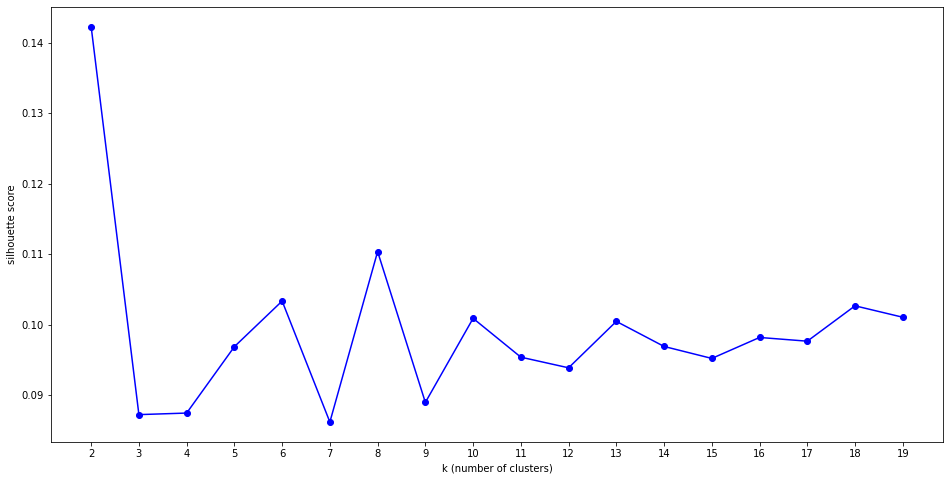

In [106]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

In [109]:
kmeans = KMeans()
kmeans.fit(features_scaled)
clusters = kmeans.predict(features_scaled)
features_scaled_df["cluster"]=clusters

In [110]:
pd.Series(clusters).value_counts().sort_index()

0    113
1     33
2    100
3    109
4    157
5    138
6    131
7      3
dtype: int64